In [21]:
import pandas as pd
import matplotlib.pyplot as plt
import os

In [26]:
df = pd.read_csv('/Users/kaciechong/Desktop/Nexus/raw/Hope.csv')
df

,Unnamed: 0,Textual Answer,Textual Answer.1,Textual Answer.2,Textual Answer.3
0,NaN,Not at all,A little,Moderately,A lot
1,Opportunity to travel,1%,6%,17%,76%
2,Learning about the host (another or heritage) ...,1%,6%,21%,71%
3,Developing intercultural skills,1%,4%,24%,70%
4,Increased awareness of global issues,2%,7%,24%,67%
5,Developing independence,3%,8%,23%,67%
6,Adapting to challenges,2%,8%,27%,63%
7,Reasoning and problem-solving in an internatio...,2%,9%,31%,59%
8,Fulfilling academic requirements,2%,12%,30%,55%
9,Getting a different perspective in their field...,3%,13%,36%,48%


In [27]:
df = df.rename(columns={'Unnamed: 0': 'Reason'})
df = df.rename(columns={'Textual Answer': 'Not at all'})
df = df.rename(columns={'Textual Answer.1': 'A little'})
df = df.rename(columns={'Textual Answer.2': 'Moderately'})
df = df.rename(columns={'Textual Answer.3': 'A lot'})
df = df.drop(0)
df

,Reason,Not at all,A little,Moderately,A lot
1,Opportunity to travel,1%,6%,17%,76%
2,Learning about the host (another or heritage) ...,1%,6%,21%,71%
3,Developing intercultural skills,1%,4%,24%,70%
4,Increased awareness of global issues,2%,7%,24%,67%
5,Developing independence,3%,8%,23%,67%
6,Adapting to challenges,2%,8%,27%,63%
7,Reasoning and problem-solving in an internatio...,2%,9%,31%,59%
8,Fulfilling academic requirements,2%,12%,30%,55%
9,Getting a different perspective in their field...,3%,13%,36%,48%
10,Developing leadership skills,7%,16%,33%,45%


In [28]:
df['Reason'] = df['Reason'].replace({
    'Learning about the host (another or heritage) culture': 'Learning about culture',
    'Reasoning and problem-solving in an international context': 'Problem-solving internationally',
    'Getting a different perspective in their field of study': 'Different perspective in field of study',
    'Expanding or improving career or postgraduate options': 'Expanding career/postgraduate options',
    'Having internship/research/volunteer opportunities': 'Internship/research/volunteering'
})

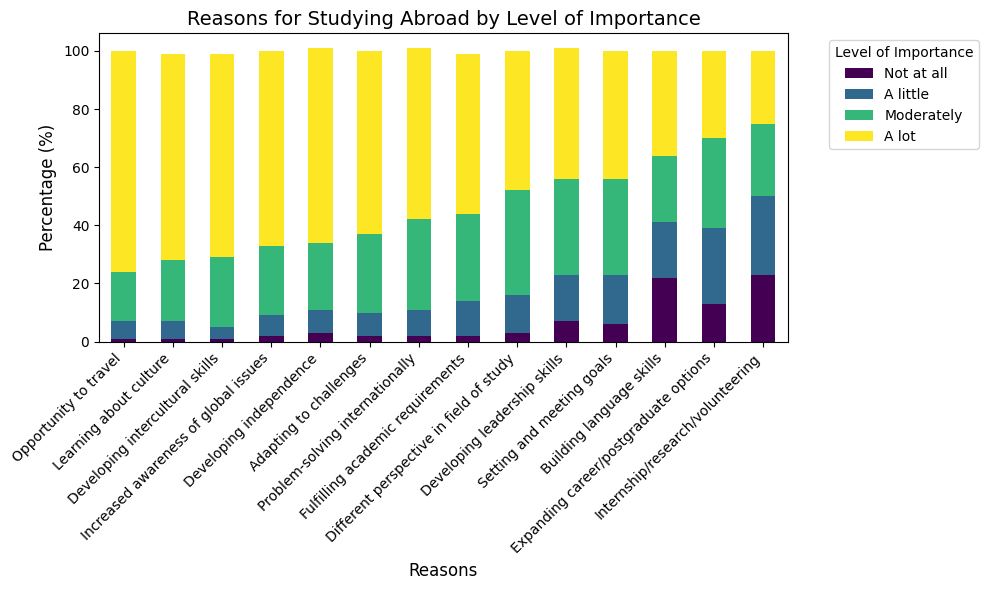

In [29]:
df.set_index('Reason', inplace=True)

# Remove the '%' sign and convert to numeric
df = df.replace('%', '', regex=True)  # Remove '%' sign
df = df.apply(pd.to_numeric)  # Convert to numeric (as percentage)

# Plot the stacked bar chart
ax = df.plot(kind='bar', stacked=True, figsize=(10, 6), colormap='viridis')

# Add titles and labels
plt.title('Reasons for Studying Abroad by Level of Importance', fontsize=14)
plt.xlabel('Reasons', fontsize=12)
plt.ylabel('Percentage (%)', fontsize=12)
plt.xticks(rotation=45, ha='right')  # Rotate labels for better readability
plt.legend(title="Level of Importance", bbox_to_anchor=(1.05, 1), loc='upper left')

# Display the plot
plt.tight_layout()  # Adjust layout to fit everything
desktop = os.path.join(os.path.expanduser('~'), 'Desktop')

save_path = os.path.join(desktop, 'reasons.png')

# Save the figure
plt.savefig(save_path, dpi=300)